<a href="https://colab.research.google.com/github/sardarmoneeb/Machine-Learning/blob/main/Food_Calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kill -9 -1


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset'
target_path = '/content/drive/MyDrive/indian-food-images-dataset'

od.download(dataset_url, data_dir=target_path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moneebmushtaq
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset


100%|██████████| 355M/355M [00:03<00:00, 117MB/s] 


In [ ]:
import shutil
import os

# Current (nested) path
src = "/content/drive/MyDrive/indian-food-images-dataset/indian-food-images-dataset/Indian Food Images/Indian Food Images"
dst = "/content/drive/MyDrive/Indian_Food_Images_Dataset"

# Move all class folders (e.g., adhirasam, dosa, etc.)
for folder in os.listdir(src):
    shutil.move(os.path.join(src, folder), dst)

print("✅ Dataset structure fixed! Classes moved to:", dst)


✅ Dataset structure fixed! Classes moved to: /content/drive/MyDrive/Indian_Food_Images_Dataset


In [ ]:
import os

data_dir = "/content/drive/MyDrive/Indian_Food_Images_Dataset"
print("Total classes:", len(os.listdir(data_dir)))
print("Example classes:", os.listdir(data_dir)[:10])


Total classes: 129
Example classes: ['02d09e872d.jpg', '02f2e49039.jpg', '06c639bab2.jpg', '08b8f8efc1.jpg', '09a37d7cc7.jpg', '0cd70ffc10.jpg', '0d09b0e580.jpg', '0e84c2b7fd.jpg', '10f608ecc4.jpg', '12b1eb8026.jpg']


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"

classes = os.listdir(dataset_path)
print("Total classes:", len(classes))
print("Example classes:", classes[:10])


Total classes: 129
Example classes: ['02d09e872d.jpg', '02f2e49039.jpg', '06c639bab2.jpg', '08b8f8efc1.jpg', '09a37d7cc7.jpg', '0cd70ffc10.jpg', '0d09b0e580.jpg', '0e84c2b7fd.jpg', '10f608ecc4.jpg', '12b1eb8026.jpg']


In [ ]:
import os

# Adjust this if needed
base_path = "/content"

for root, dirs, files in os.walk(base_path):
    if 'aloo_gobi' in dirs:
        print("✅ Correct dataset path found at:", os.path.join(root, 'aloo_gobi'))
        break


✅ Correct dataset path found at: /content/drive/MyDrive/Indian_Food_Images_Dataset/aloo_gobi


In [ ]:
import os

# ✅ Set dataset path (root folder containing all food categories)
dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"

# Get class folders (each folder = one food type)
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

print("Total classes:", len(classes))
print("Example classes:", classes[:10])

# Count total images
total_images = sum([len(files) for _, _, files in os.walk(dataset_path)])
print("Total images:", total_images)


Total classes: 79
Example classes: ['aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura']
Total images: 4000


In [ ]:
from PIL import Image
import os
import numpy as np
from tqdm import tqdm

dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"

widths = []
heights = []

# Collect image dimensions
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
            except:
                pass  # skip corrupted images

print(f"✅ Total images analyzed: {len(widths)}")
print(f"📏 Average Width: {np.mean(widths):.2f}")
print(f"📏 Average Height: {np.mean(heights):.2f}")
print(f"🔹 Min Width: {np.min(widths)}, Max Width: {np.max(widths)}")
print(f"🔹 Min Height: {np.min(heights)}, Max Height: {np.max(heights)}")


✅ Total images analyzed: 3950
📏 Average Width: 610.61
📏 Average Height: 550.67
🔹 Min Width: 129, Max Width: 4264
🔹 Min Height: 117, Max Height: 4032


In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224


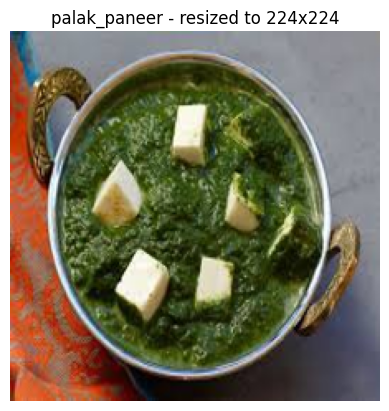

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random
import os

dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"
classes = os.listdir(dataset_path)

sample_class = random.choice(classes)
sample_folder = os.path.join(dataset_path, sample_class)
sample_image = random.choice(os.listdir(sample_folder))

img_path = os.path.join(sample_folder, sample_image)
img = Image.open(img_path).resize((IMG_WIDTH, IMG_HEIGHT))

plt.imshow(img)
plt.title(f"{sample_class} - resized to {IMG_WIDTH}x{IMG_HEIGHT}")
plt.axis("off")
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"

# Count images in each class
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        class_counts[class_name] = len(os.listdir(class_folder))

# Convert to DataFrame for analysis
df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image_Count"])
df_counts = df_counts.sort_values(by="Image_Count", ascending=False)

print("✅ Total Classes:", len(df_counts))
df_counts.head(500)


✅ Total Classes: 79


,Class,Image_Count
0,aloo_gobi,50
1,aloo_matar,50
2,aloo_methi,50
3,aloo_shimla_mirch,50
4,aloo_tikki,50
...,...,...
74,shrikhand,50
75,sohan_halwa,50
76,sohan_papdi,50
77,sutar_feni,50


In [ ]:
print("📊 Max images in a class:", df_counts['Image_Count'].max())
print("📉 Min images in a class:", df_counts['Image_Count'].min())
print("📈 Average images per class:", df_counts['Image_Count'].mean())


📊 Max images in a class: 50
📉 Min images in a class: 50
📈 Average images per class: 50.0


In [ ]:
# Authentic Indian Food Calorie Database
# Based on standard portion sizes and nutritional facts

food_calories_authentic = {
    # SWEETS & DESSERTS (per piece unless specified)
    "gulab_jamun": 150,  # 1 piece
    "jalebi": 125,       # 50g serving
    "rasgulla": 150,     # 1 piece
    "ras_malai": 180,    # 1 piece
    "sandesh": 80,       # 1 piece
    "barfi": 120,        # 1 piece
    "mysore_pak": 140,   # 1 piece
    "gajar_ka_halwa": 250,  # 1 bowl (150g)
    "kheer": 200,        # 1 bowl
    "shrikhand": 180,    # 1 bowl (100g)
    "balushahi": 200,    # 1 piece
    "imarti": 150,       # 1 piece
    "malpua": 180,       # 1 piece
    "soan_papdi": 120,   # 1 piece
    "laddoo": 150,       # 1 piece
    "halwa": 200,        # 1 bowl

    # BREADS (per piece)
    "roti": 70,
    "chapati": 70,
    "naan": 260,
    "paratha": 200,
    "puri": 100,
    "bhatura": 200,
    "kulcha": 150,

    # RICE DISHES (per plate)
    "biryani": 400,
    "pulao": 300,
    "plain_rice": 200,
    "khichdi": 250,

    # VEGETARIAN MAIN COURSE (per bowl)
    "palak_paneer": 280,
    "paneer_butter_masala": 350,
    "matar_paneer": 250,
    "chana_masala": 200,
    "dal_makhani": 300,
    "dal_tadka": 180,
    "aloo_gobi": 150,
    "bhindi_masala": 120,
    "baingan_bharta": 180,

    # NON-VEGETARIAN (per bowl)
    "butter_chicken": 450,
    "chicken_tikka": 180,    # 2 pieces
    "chicken_curry": 300,
    "fish_curry": 250,
    "mutton_curry": 350,
    "egg_curry": 200,

    # SNACKS & APPETIZERS
    "samosa": 150,       # 1 piece
    "pakora": 100,       # 1 piece
    "kachori": 150,      # 1 piece
    "dahi_vada": 150,    # 1 piece
    "pav_bhaji": 400,    # 1 plate
    "chole_bhature": 500, # 1 plate
    "vada_pav": 250,     # 1 piece
    "dosa": 150,         # 1 piece
    "idli": 50,          # 1 piece

    # BEVERAGES
    "lassi": 160,        # 1 glass
    "chai": 60,          # 1 cup
    "masala_chai": 80,   # 1 cup
}

# Your specific foods with realistic calories
your_foods = {
    # From your lists with realistic estimates
    "bandar_laddu": 180,
    "basundi": 300,      # Rich milk dessert
    "bhatura": 220,
    "bhindi_masala": 120,
    "biryani": 400,
    "boondi": 140,
    "butter_chicken": 450,
    "chak_hao_kheer": 250,  # Black rice kheer
    "cham_cham": 160,
    "chana_masala": 200,
    "chapati": 70,
    "chhena_kheeri": 280,   # Rich cheese dessert
    "chicken_razala": 320,
    "chicken_tikka": 200,
    "chicken_tikka_masala": 380,
    "chikki": 150,
    "daal_baati_churma": 500,  # Heavy Rajasthani dish
    "daal_puri": 200,
    "dal_makhani": 320,
    "dal_tadka": 180,
    "dharwad_pedha": 130,
    "doodhpak": 220,
    "double_ka_meetha": 280,
    "dum_aloo": 200,
    "gajar_ka_halwa": 280,
    "gavvalu": 100,      # Sweet shells
    "ghevar": 250,       # Festival sweet
    "gulab_jamun": 150,
    "imarti": 170,
    "jalebi": 160,
    "kalakand": 180,
    "karela_bharta": 80, # Bitter gourd - low calorie
    "kofta": 220,
    "kuzhi_paniyaram": 80,
    "lassi": 160,
    "ledikeni": 200,
    "litti_chokha": 300,
    "maach_jhol": 220,
    "makki_di_roti_sarson_da_saag": 350,
    "malapua": 180,
    "misi_roti": 180,
    "misti_doi": 150,
    "modak": 120,
    "mysore_pak": 220,
    "naan": 280,
    "navrattan_korma": 320,
    "palak_paneer": 280,
    "paneer_butter_masala": 380,
    "phirni": 200,
    "pithe": 150,
    "poha": 180,
    "poornalu": 140,
    "pootharekulu": 130,
    "qubani_ka_meetha": 210,
    "rabri": 320,
    "ras_malai": 190,
    "rasgulla": 150,
    "sandesh": 120,
    "shankarpali": 90,
    "sheer_korma": 350,  # Rich vermicelli dessert
    "sheera": 250,
    "shrikhand": 180,
    "sohan_halwa": 240,
    "sohan_papdi": 120,
    "sutar_feni": 140,
    "unni_appam": 110,
    "yangcha": 160
}

def display_realistic_calories():
    print("AUTHENTIC INDIAN FOOD CALORIES")
    print("=" * 60)
    print(f"{'Food Item':<25} {'Calories':<10} {'Portion':<20}")
    print("-" * 60)

    # Display with portion information
    portion_info = {
        "sweets": "per piece",
        "breads": "per piece",
        "rice": "per plate",
        "curries": "per bowl",
        "snacks": "per piece"
    }

    for food, calories in sorted(your_foods.items()):
        # Determine portion type
        if any(keyword in food for keyword in ['laddu', 'jamun', 'rasgulla', 'barfi', 'sandesh', 'halwa', 'kheer']):
            portion = "per piece/bowl"
        elif any(keyword in food for keyword in ['roti', 'naan', 'chapati', 'bhatura', 'puri']):
            portion = "per piece"
        elif any(keyword in food for keyword in ['biryani', 'pulao', 'rice']):
            portion = "per plate"
        elif any(keyword in food for keyword in ['chicken', 'mutton', 'fish', 'paneer', 'dal', 'curry']):
            portion = "per bowl"
        else:
            portion = "per serving"

        print(f"{food:<25} {calories:<10} {portion:<20}")

    print("-" * 60)
    print(f"Total items: {len(your_foods)}")

def calculate_meal_calories(meal_items):
    """Calculate total calories for a meal"""
    total = 0
    print("\nMEAL CALORIE CALCULATION:")
    print("-" * 40)
    for item in meal_items:
        if item in your_foods:
            print(f"✓ {item}: {your_foods[item]} calories")
            total += your_foods[item]
        else:
            print(f"✗ {item}: Not in database")
    print(f"Total: {total} calories")
    return total

def get_calorie_advice(total_calories):
    """Provide advice based on total calories"""
    print(f"\nCALORIE ANALYSIS:")
    if total_calories < 500:
        print("✅ Light meal - Good for weight loss")
    elif 500 <= total_calories <= 800:
        print("✅ Moderate meal - Balanced intake")
    elif 800 < total_calories <= 1200:
        print("⚠️  Heavy meal - Consider portion control")
    else:
        print("❌ Very high calorie - Might exceed daily needs")

# Display the database
display_realistic_calories()

# Example usage
print("\n" + "=" * 60)
print("EXAMPLE MEAL CALCULATIONS")
print("=" * 60)

# Sample meals
meal_1 = ["chapati", "dal_tadka", "bhindi_masala", "rasgulla"]
meal_2 = ["biryani", "butter_chicken", "naan", "gulab_jamun"]

print("\nMeal 1 (Vegetarian):")
total1 = calculate_meal_calories(meal_1)
get_calorie_advice(total1)

print("\nMeal 2 (Non-vegetarian):")
total2 = calculate_meal_calories(meal_2)
get_calorie_advice(total2)

# Export to CSV
import pandas as pd

def export_database():
    df = pd.DataFrame([
        {"food_item": k, "calories": v, "category": "sweet" if any(x in k for x in ['laddu', 'jamun', 'halwa', 'kheer']) else "main_course"}
        for k, v in your_foods.items()
    ])
    df.to_csv('authentic_indian_food_calories.csv', index=False)
    print(f"\n✅ Database exported with {len(your_foods)} authentic items")

export_database()

print(f"\n💡 Note: Calories are estimates for standard portions.")
print("Actual values may vary based on recipe and serving size.")

AUTHENTIC INDIAN FOOD CALORIES
Food Item                 Calories   Portion             
------------------------------------------------------------
bandar_laddu              180        per piece/bowl      
basundi                   300        per serving         
bhatura                   220        per piece           
bhindi_masala             120        per serving         
biryani                   400        per plate           
boondi                    140        per serving         
butter_chicken            450        per bowl            
chak_hao_kheer            250        per piece/bowl      
cham_cham                 160        per serving         
chana_masala              200        per serving         
chapati                   70         per piece           
chhena_kheeri             280        per piece/bowl      
chicken_razala            320        per bowl            
chicken_tikka             200        per bowl            
chicken_tikka_masala      380        p

In [ ]:
import os
import pandas as pd

# Path to your dataset
dataset_path = "Indian_Food_Images_Dataset"

# Your existing calorie dictionary
your_foods = {
    "bandar_laddu": 180, "basundi": 300, "bhatura": 220, "bhindi_masala": 120,
    "biryani": 400, "boondi": 140, "butter_chicken": 450, "chak_hao_kheer": 250,
    "cham_cham": 160, "chana_masala": 200, "chapati": 70, "chhena_kheeri": 280,
    "chicken_razala": 320, "chicken_tikka": 200, "chicken_tikka_masala": 380,
    "chikki": 150, "daal_baati_churma": 500, "daal_puri": 200, "dal_makhani": 320,
    "dal_tadka": 180, "dharwad_pedha": 130, "doodhpak": 220, "double_ka_meetha": 280,
    "dum_aloo": 200, "gajar_ka_halwa": 280, "gavvalu": 100, "ghevar": 250,
    "gulab_jamun": 150, "imarti": 170, "jalebi": 160, "kalakand": 180,
    "karela_bharta": 80, "kofta": 220, "kuzhi_paniyaram": 80, "lassi": 160,
    "ledikeni": 200, "litti_chokha": 300, "maach_jhol": 220,
    "makki_di_roti_sarson_da_saag": 350, "malapua": 180, "misi_roti": 180,
    "misti_doi": 150, "modak": 120, "mysore_pak": 220, "naan": 280,
    "navrattan_korma": 320, "palak_paneer": 280, "paneer_butter_masala": 380,
    "phirni": 200, "pithe": 150, "poha": 180, "poornalu": 140,
    "pootharekulu": 130, "qubani_ka_meetha": 210, "rabri": 320, "ras_malai": 190,
    "rasgulla": 150, "sandesh": 120, "shankarpali": 90, "sheer_korma": 350,
    "sheera": 250, "shrikhand": 180, "sohan_halwa": 240, "sohan_papdi": 120,
    "sutar_feni": 140, "unni_appam": 110, "yangcha": 160
}

data = []
for food, cal in your_foods.items():
    folder_path = os.path.join(dataset_path, food)
    if os.path.exists(folder_path):
        for img in os.listdir(folder_path):
            if img.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append([os.path.join(folder_path, img), cal])

# Create a dataframe
df = pd.DataFrame(data, columns=["filename", "calories"])
df.to_csv("indian_food_calorie_labels.csv", index=False)
print(f"✅ CSV created with {len(df)} images and calorie values")


✅ CSV created with 0 images and calorie values


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import os
os.listdir("/content")


['.config',
 'drive',
 'authentic_indian_food_calories.csv',
 'indian_food_calorie_labels.csv',
 'sample_data']

In [ ]:
import os
import pandas as pd

# Google Drive path to your dataset folder
dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"

# Assuming you already have your 'df' dataframe ready
csv_save_path = os.path.join(dataset_path, "indian_food_calorie_labels.csv")

df.to_csv(csv_save_path, index=False)
print(f"✅ CSV saved inside dataset folder: {csv_save_path}")


✅ CSV saved inside dataset folder: /content/drive/MyDrive/Indian_Food_Images_Dataset/indian_food_calorie_labels.csv


In [ ]:
print(os.listdir(dataset_path))


['02d09e872d.jpg', '02f2e49039.jpg', '06c639bab2.jpg', '08b8f8efc1.jpg', '09a37d7cc7.jpg', '0cd70ffc10.jpg', '0d09b0e580.jpg', '0e84c2b7fd.jpg', '10f608ecc4.jpg', '12b1eb8026.jpg', '13a2cfd13f.jpg', '13d63deed2.jpg', '14a2340ece.jpg', '14d893495c.jpg', '1a77e9cec2.jpg', '1a9346fd1e.jpg', '1d8712cb99.jpg', '1fe5414330.jpg', '2f6cc87911.jpg', '3a38984b2b.jpg', '3a804a31ab.jpg', '3bfa35cec4.jpg', '3c92b54e3f.jpg', '3d7b2d49d0.jpg', '3d959a621f.jpg', '4a16219bba.jpg', '4b4cdebe22.jpg', '4ba54c8c49.jpg', '4dc22aeaa4.jpg', '4df2abf698.jpg', '4e9dd787c7.jpg', '5b3f7359b7.jpg', '5f7df33e72.jpg', '5f8b688ebc.jpg', '5fc5acb884.jpg', '6b51759dac.jpg', '6b7aa00d7d.jpg', '6fd85e0d12.jpg', '7bc5fab65b.jpg', '7d120ae799.jpg', '7dd072e690.jpg', '7e1919ccbf.jpg', '8ac8bbff12.jpg', '8b184989c0.jpg', '8d63c56cdc.jpg', '8e1361fc0a.jpg', '8f0fce678c.jpg', '9aa8de6d09.jpg', '9d7f91c812.jpg', '9fb6ec6325.jpg', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'b

In [6]:
import pandas as pd

csv_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset/indian_food_calorie_labels.csv"
df = pd.read_csv(csv_path)
print(df.columns)
df.head()


Index(['filename', 'calories'], dtype='object')


,filename,calories
0,/content/drive/MyDrive/Indian_Food_Images_Data...,180
1,/content/drive/MyDrive/Indian_Food_Images_Data...,180
2,/content/drive/MyDrive/Indian_Food_Images_Data...,180
3,/content/drive/MyDrive/Indian_Food_Images_Data...,180
4,/content/drive/MyDrive/Indian_Food_Images_Data...,180


In [7]:
import os
import pandas as pd

dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"

# Your calorie dictionary
your_foods = {
    "bandar_laddu": 180, "basundi": 300, "bhatura": 220, "bhindi_masala": 120,
    "biryani": 400, "boondi": 140, "butter_chicken": 450, "chak_hao_kheer": 250,
    "cham_cham": 160, "chana_masala": 200, "chapati": 70, "chhena_kheeri": 280,
    "chicken_razala": 320, "chicken_tikka": 200, "chicken_tikka_masala": 380,
    "chikki": 150, "daal_baati_churma": 500, "daal_puri": 200, "dal_makhani": 320,
    "dal_tadka": 180, "dharwad_pedha": 130, "doodhpak": 220, "double_ka_meetha": 280,
    "dum_aloo": 200, "gajar_ka_halwa": 280, "gavvalu": 100, "ghevar": 250,
    "gulab_jamun": 150, "imarti": 170, "jalebi": 160, "kalakand": 180,
    "karela_bharta": 80, "kofta": 220, "kuzhi_paniyaram": 80, "lassi": 160,
    "ledikeni": 200, "litti_chokha": 300, "maach_jhol": 220,
    "makki_di_roti_sarson_da_saag": 350, "malapua": 180, "misi_roti": 180,
    "misti_doi": 150, "modak": 120, "mysore_pak": 220, "naan": 280,
    "navrattan_korma": 320, "palak_paneer": 280, "paneer_butter_masala": 380,
    "phirni": 200, "pithe": 150, "poha": 180, "poornalu": 140,
    "pootharekulu": 130, "qubani_ka_meetha": 210, "rabri": 320, "ras_malai": 190,
    "rasgulla": 150, "sandesh": 120, "shankarpali": 90, "sheer_korma": 350,
    "sheera": 250, "shrikhand": 180, "sohan_halwa": 240, "sohan_papdi": 120,
    "sutar_feni": 140, "unni_appam": 110, "yangcha": 160
}

# Collect all images and calories
data = []
for food_class, cal in your_foods.items():
    folder_path = os.path.join(dataset_path, food_class)
    if os.path.exists(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                full_path = os.path.join(folder_path, img_file)
                data.append([full_path, cal])
    else:
        print(f"⚠️ Folder missing: {food_class}")

# Create dataframe
df = pd.DataFrame(data, columns=['filename', 'calories'])
print(f"Total images collected: {len(df)}")

# Save CSV inside dataset folder
csv_save_path = os.path.join(dataset_path, 'indian_food_calorie_labels.csv')
df.to_csv(csv_save_path, index=False)
print(f"✅ CSV saved at: {csv_save_path}")


⚠️ Folder missing: yangcha
Total images collected: 3300
✅ CSV saved at: /content/drive/MyDrive/Indian_Food_Images_Dataset/indian_food_calorie_labels.csv


In [8]:
import os
import pandas as pd

dataset_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset"
csv_path = os.path.join(dataset_path, "indian_food_calorie_labels.csv")

# Check if CSV exists and inspect
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(f"✅ CSV loaded, total images: {len(df)}")
    print(df.head())
else:
    print("❌ CSV not found. Please generate it first.")


✅ CSV loaded, total images: 3300
                                            filename  calories
0  /content/drive/MyDrive/Indian_Food_Images_Data...       180
1  /content/drive/MyDrive/Indian_Food_Images_Data...       180
2  /content/drive/MyDrive/Indian_Food_Images_Data...       180
3  /content/drive/MyDrive/Indian_Food_Images_Data...       180
4  /content/drive/MyDrive/Indian_Food_Images_Data...       180


In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [5]:
csv_path = "/content/drive/MyDrive/Indian_Food_Images_Dataset/indian_food_calorie_labels.csv"
df = pd.read_csv(csv_path)
print(df.head(20))
print(df.shape)


                                             filename  calories
0   /content/drive/MyDrive/Indian_Food_Images_Data...       180
1   /content/drive/MyDrive/Indian_Food_Images_Data...       180
2   /content/drive/MyDrive/Indian_Food_Images_Data...       180
3   /content/drive/MyDrive/Indian_Food_Images_Data...       180
4   /content/drive/MyDrive/Indian_Food_Images_Data...       180
5   /content/drive/MyDrive/Indian_Food_Images_Data...       180
6   /content/drive/MyDrive/Indian_Food_Images_Data...       180
7   /content/drive/MyDrive/Indian_Food_Images_Data...       180
8   /content/drive/MyDrive/Indian_Food_Images_Data...       180
9   /content/drive/MyDrive/Indian_Food_Images_Data...       180
10  /content/drive/MyDrive/Indian_Food_Images_Data...       180
11  /content/drive/MyDrive/Indian_Food_Images_Data...       180
12  /content/drive/MyDrive/Indian_Food_Images_Data...       180
13  /content/drive/MyDrive/Indian_Food_Images_Data...       180
14  /content/drive/MyDrive/Indian_Food_I

In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

# =========================================
# 📂 Step 2: Load and Prepare Data
# =========================================
# assuming df already loaded with filename and calories columns

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# normalize calories
max_calories = train_df['calories'].max()
train_df['calories'] = train_df['calories'] / max_calories
val_df['calories'] = val_df['calories'] / max_calories


In [7]:
# Step 3: Data Generators with Augmentation
# =========================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filename",
    y_col="calories",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filename",
    y_col="calories",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)


Found 2640 validated image filenames.
Found 660 validated image filenames.


In [8]:
# Step 4: Model Building (ResNet50)
# =========================================
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output = Dense(1, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze last 50 layers for fine-tuning
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Step 5: Compile Model
# =========================================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=Huber(),
    metrics=['mae']
)

# =========================================
# 🚀 Step 6: Callbacks
# =========================================
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [9]:
df.head()


,filename,calories
0,/content/drive/MyDrive/Indian_Food_Images_Data...,180
1,/content/drive/MyDrive/Indian_Food_Images_Data...,180
2,/content/drive/MyDrive/Indian_Food_Images_Data...,180
3,/content/drive/MyDrive/Indian_Food_Images_Data...,180
4,/content/drive/MyDrive/Indian_Food_Images_Data...,180


In [10]:
import os

missing = [f for f in df['filename'] if not os.path.exists(f)]
print("Missing files:", len(missing))


Missing files: 0


In [11]:
print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)


Train shape: (2640, 2)
Val shape: (660, 2)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Recreate the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Make sure train_df and val_df exist already
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filename",
    y_col="calories",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filename",
    y_col="calories",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)


Found 2640 validated image filenames.
Found 660 validated image filenames.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(1)  # regression output
])

optimizer = Adam(learning_rate=1e-5)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# =========================================
# 📦 Step 1: Import Libraries
# =========================================
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import Huber

# =========================================
# 📂 Step 2: Create Train/Validation Split
# =========================================
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

max_calories = train_df['calories'].max()
train_df['calories'] = train_df['calories'] / max_calories
val_df['calories'] = val_df['calories'] / max_calories

# =========================================
# 🧠 Step 3: Data Generators
# =========================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filename",
    y_col="calories",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filename",
    y_col="calories",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw"
)

# =========================================
# 🏗️ Step 4: Build Model (ResNet50)
# =========================================
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base layers initially
for layer in base_model.layers:
    layer.trainable = False

# =========================================
# ⚙️ Step 5: Compile Model
# =========================================
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=Huber(),
              metrics=['mae'])

# =========================================
# 🧩 Step 6: Callbacks
# =========================================
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_mae',
    patience=6,
    restore_best_weights=True,
    verbose=1
)




Found 2640 validated image filenames.
Found 660 validated image filenames.


In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[reduce_lr, early_stop]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 605s 7s/step - loss: 0.2558 - mae: 0.5728 - val_loss: 0.0348 - val_mae: 0.2321 - learning_rate: 1.0000e-04
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 580s 7s/step - loss: 0.0460 - mae: 0.2402 - val_loss: 0.0192 - val_mae: 0.1595 - learning_rate: 1.0000e-04
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 579s 7s/step - loss: 0.0308 - mae: 0.1958 - val_loss: 0.0190 - val_mae: 0.1458 - learning_rate: 1.0000e-04
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 611s 7s/step - loss: 0.0257 - mae: 0.1772 - val_loss: 0.0201 - val_mae: 0.1462 - learning_rate: 1.0000e-04
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 578s 7s/step - loss: 0.0227 - mae: 0.1696 - val_loss: 0.0189 - val_mae: 0.1446 - learning_rate: 1.0000e-04
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 579s 7s/step - loss: 0.0230 - mae: 0.1694 - val_loss: 0.0193 - val_mae: 0.1445 - learning_rate: 1.0000e-04
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 583s 7s/step - loss: 0.0212 - mae: 0.1612 - val_loss: 0.0201 - val_mae: 0.1462 - learning_ra

In [18]:
# 🔹 Step 1: Make predictions on validation data
predicted = model.predict(val_generator)

# 🔹 Step 2: Convert predicted and true values back to actual calories
predicted_actual = predicted.flatten() * max_calories
true_actual = val_generator.labels * max_calories

# 🔹 Step 3: Compare the first few predictions
for i in range(5):
    print(f"Predicted: {predicted_actual[i]:.2f} | Actual: {true_actual[i]:.2f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step
Predicted: 175.85 | Actual: 300.00
Predicted: 205.22 | Actual: 200.00
Predicted: 182.18 | Actual: 100.00
Predicted: 222.11 | Actual: 120.00
Predicted: 194.39 | Actual: 400.00


In [21]:
for layer in model.layers[-40:]:  # Unfreeze last 40 layers
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss=Huber(),
              metrics=['mae'])
model.fit(train_generator,
          validation_data=val_generator,
          epochs=5,
          callbacks=[reduce_lr, early_stop])


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 839s 10s/step - loss: 0.0197 - mae: 0.1555 - val_loss: 0.0175 - val_mae: 0.1449 - learning_rate: 1.0000e-05
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 855s 10s/step - loss: 0.0187 - mae: 0.1517 - val_loss: 0.0178 - val_mae: 0.1464 - learning_rate: 1.0000e-05
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 835s 10s/step - loss: 0.0190 - mae: 0.1532 - val_loss: 0.0170 - val_mae: 0.1439 - learning_rate: 1.0000e-05
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 800s 10s/step - loss: 0.0181 - mae: 0.1508 - val_loss: 0.0177 - val_mae: 0.1405 - learning_rate: 1.0000e-05
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 806s 10s/step - loss: 0.0188 - mae: 0.1531 - val_loss: 0.0178 - val_mae: 0.1458 - learning_rate: 1.0000e-05
Restoring model weights from the end of the best epoch: 4.


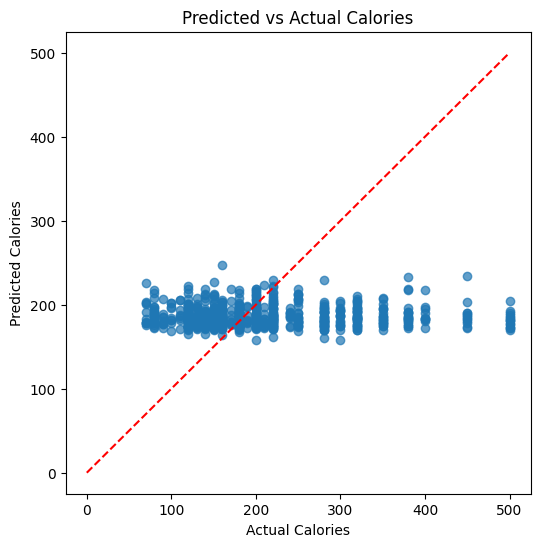

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(true_actual, predicted_actual, alpha=0.7)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Predicted vs Actual Calories")
plt.plot([0, 500], [0, 500], 'r--')  # Perfect prediction line
plt.show()


In [23]:
model.save("/content/drive/MyDrive/food_calorie_model_resnet50.h5")


In [24]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/food_calorie_model_resnet50.h5", compile=False)


In [ ]:
# from tensorflow.keras.applications import EfficientNetB3
# base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224,224,3))


In [ ]:
# # =========================================
# # 📦 Step 1: Import Libraries
# # =========================================
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout   # ✅ Added Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from tensorflow.keras.losses import Huber
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split


In [ ]:
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     brightness_range=[0.8, 1.2],
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=train_df,
#     x_col="filename",
#     y_col="calories",
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode="raw"
# )

# val_generator = val_datagen.flow_from_dataframe(
#     dataframe=val_df,
#     x_col="filename",
#     y_col="calories",
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode="raw"
# )

# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.3)(x)  # Add dropout
# x = Dropout(0.2)(x)
# output = Dense(1, activation='linear')(x)


# model = Model(inputs=base_model.input, outputs=output)

# for layer in base_model.layers:
#     layer.trainable = False


# # Unfreeze last 30 layers of ResNet50
# # for layer in base_model.layers[-30:]:
# #     layer.trainable = True

# # model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
# # model.compile(optimizer=Adam(learning_rate=1e-4),
# #               loss=Huber(),
# #               metrics=['mae'])

# # model.summary()
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     brightness_range=[0.8, 1.2],
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# from tensorflow.keras.losses import Huber
# model.compile(optimizer=Adam(learning_rate=1e-4), loss=Huber(), metrics=['mae'])

# from tensorflow.keras.callbacks import ReduceLROnPlateau

# lr_scheduler = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,
#     patience=3,
#     min_lr=1e-6,
#     verbose=1
# )

Found 2640 validated image filenames.
Found 660 validated image filenames.


In [ ]:
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=15,
#     callbacks=[lr_scheduler]
# )


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 600s 7s/step - loss: 212.1953 - mae: 212.6953 - val_loss: 201.7567 - val_mae: 202.2567 - learning_rate: 1.0000e-04
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 586s 7s/step - loss: 199.4309 - mae: 199.9309 - val_loss: 180.3422 - val_mae: 180.8422 - learning_rate: 1.0000e-04
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 585s 7s/step - loss: 171.7705 - mae: 172.2705 - val_loss: 141.0318 - val_mae: 141.5310 - learning_rate: 1.0000e-04
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 619s 7s/step - loss: 131.5260 - mae: 132.0253 - val_loss: 93.9132 - val_mae: 94.4111 - learning_rate: 1.0000e-04
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 597s 7s/step - loss: 92.0997 - mae: 92.5988 - val_loss: 73.9191 - val_mae: 74.4152 - learning_rate: 1.0000e-04
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 585s 7s/step - loss: 82.4020 - mae: 82.9009 - val_loss: 71.9543 - val_mae: 72.4520 - learning_rate: 1.0000e-04
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 620s 7s/step - loss: 80.7895 - mae: 81.2885 - val_loss